In [1]:
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim

In [2]:
from utils import get_device , visualize_data

device = get_device()

Device :  cuda


In [3]:
from dataset import CIFAR10

data = CIFAR10()

train_loader , test_loader = data.get_loaders()

100%|██████████| 170498071/170498071 [00:02<00:00, 85219869.01it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [4]:
classes = [
            "plane",
            "car",
            "bird",
            "cat",
            "deer",
            "dog",
            "frog",
            "horse",
            "ship",
            "truck",
        ]

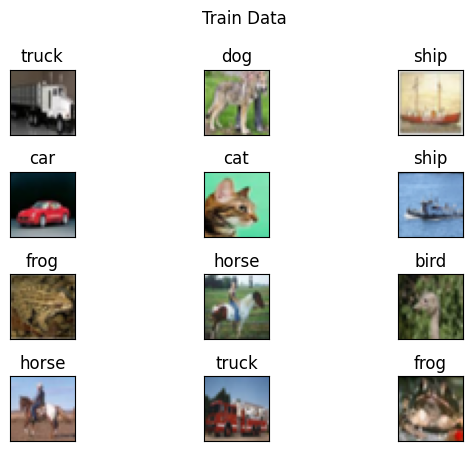

In [5]:
visualize_data(train_loader,12,"Train Data",classes)

# Model

## LayerNorm

In [6]:
from model import Model

In [7]:
model1 = Model(norm_type = "layer",dropout=0.01, skip=True).to(device)
from torchsummary import summary
summary(model1 , input_size = (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
         GroupNorm-2           [-1, 16, 30, 30]              32
              ReLU-3           [-1, 16, 30, 30]               0
           Dropout-4           [-1, 16, 30, 30]               0
         ConvLayer-5           [-1, 16, 30, 30]               0
            Conv2d-6           [-1, 16, 28, 28]           2,304
         GroupNorm-7           [-1, 16, 28, 28]              32
              ReLU-8           [-1, 16, 28, 28]               0
           Dropout-9           [-1, 16, 28, 28]               0
        ConvLayer-10           [-1, 16, 28, 28]               0
           Conv2d-11           [-1, 24, 28, 28]             384
        MaxPool2d-12           [-1, 24, 14, 14]               0
           Conv2d-13           [-1, 24, 14, 14]           5,184
        GroupNorm-14           [-1, 24,

In [8]:
from backprop import train , test

In [9]:
optimizer = optim.SGD(model1.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=0, verbose=True, factor=0.3)

train_losses = []
test_losses = []
train_acc = []
test_acc = []

EPOCHS = 20

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model1, device, train_loader, optimizer, epoch, train_losses, train_acc)
    test_loss = test(model1, device, test_loader, test_losses, test_acc)
    scheduler.step(test_loss)

EPOCH: 0


Loss=1.6772615909576416 Batch_id=390 Accuracy=29.23: 100%|██████████| 391/391 [00:20<00:00, 18.86it/s]



Test set: Average loss: 1.6398, Accuracy: 3852/10000 (38.52%)

EPOCH: 1


Loss=1.4948372840881348 Batch_id=390 Accuracy=44.60: 100%|██████████| 391/391 [00:22<00:00, 17.54it/s]



Test set: Average loss: 1.4391, Accuracy: 4592/10000 (45.92%)

EPOCH: 2


Loss=1.315672755241394 Batch_id=390 Accuracy=51.25: 100%|██████████| 391/391 [00:20<00:00, 19.19it/s]



Test set: Average loss: 1.3216, Accuracy: 5280/10000 (52.80%)

EPOCH: 3


Loss=1.3178292512893677 Batch_id=390 Accuracy=56.39: 100%|██████████| 391/391 [00:20<00:00, 19.30it/s]



Test set: Average loss: 1.1841, Accuracy: 5648/10000 (56.48%)

EPOCH: 4


Loss=0.9306254386901855 Batch_id=390 Accuracy=59.55: 100%|██████████| 391/391 [00:19<00:00, 20.38it/s]



Test set: Average loss: 1.1644, Accuracy: 5767/10000 (57.67%)

EPOCH: 5


Loss=0.866346001625061 Batch_id=390 Accuracy=62.40: 100%|██████████| 391/391 [00:19<00:00, 19.83it/s]



Test set: Average loss: 1.0334, Accuracy: 6267/10000 (62.67%)

EPOCH: 6


Loss=1.001237392425537 Batch_id=390 Accuracy=63.95: 100%|██████████| 391/391 [00:20<00:00, 19.09it/s]



Test set: Average loss: 0.9526, Accuracy: 6555/10000 (65.55%)

EPOCH: 7


Loss=0.979351818561554 Batch_id=390 Accuracy=66.11: 100%|██████████| 391/391 [00:20<00:00, 19.13it/s]



Test set: Average loss: 0.9735, Accuracy: 6511/10000 (65.11%)

Epoch 00008: reducing learning rate of group 0 to 3.0000e-03.
EPOCH: 8


Loss=0.8764101266860962 Batch_id=390 Accuracy=70.41: 100%|██████████| 391/391 [00:20<00:00, 19.24it/s]



Test set: Average loss: 0.8508, Accuracy: 6969/10000 (69.69%)

EPOCH: 9


Loss=0.8125749826431274 Batch_id=390 Accuracy=71.17: 100%|██████████| 391/391 [00:20<00:00, 19.03it/s]



Test set: Average loss: 0.8341, Accuracy: 7042/10000 (70.42%)

EPOCH: 10


Loss=0.85247403383255 Batch_id=390 Accuracy=71.99: 100%|██████████| 391/391 [00:19<00:00, 19.77it/s]



Test set: Average loss: 0.8297, Accuracy: 7008/10000 (70.08%)

EPOCH: 11


Loss=0.8583688735961914 Batch_id=390 Accuracy=72.22: 100%|██████████| 391/391 [00:20<00:00, 19.48it/s]



Test set: Average loss: 0.8153, Accuracy: 7099/10000 (70.99%)

EPOCH: 12


Loss=0.726573646068573 Batch_id=390 Accuracy=72.86: 100%|██████████| 391/391 [00:19<00:00, 20.07it/s]



Test set: Average loss: 0.8211, Accuracy: 7040/10000 (70.40%)

Epoch 00013: reducing learning rate of group 0 to 9.0000e-04.
EPOCH: 13


Loss=0.806928277015686 Batch_id=390 Accuracy=74.67: 100%|██████████| 391/391 [00:19<00:00, 19.92it/s]



Test set: Average loss: 0.7828, Accuracy: 7186/10000 (71.86%)

EPOCH: 14


Loss=0.7234053611755371 Batch_id=390 Accuracy=75.03: 100%|██████████| 391/391 [00:20<00:00, 19.40it/s]



Test set: Average loss: 0.7802, Accuracy: 7212/10000 (72.12%)

EPOCH: 15


Loss=0.5432991981506348 Batch_id=390 Accuracy=75.06: 100%|██████████| 391/391 [00:19<00:00, 19.68it/s]



Test set: Average loss: 0.7853, Accuracy: 7193/10000 (71.93%)

Epoch 00016: reducing learning rate of group 0 to 2.7000e-04.
EPOCH: 16


Loss=0.6262012124061584 Batch_id=390 Accuracy=75.91: 100%|██████████| 391/391 [00:19<00:00, 19.68it/s]



Test set: Average loss: 0.7647, Accuracy: 7284/10000 (72.84%)

EPOCH: 17


Loss=0.8116912841796875 Batch_id=390 Accuracy=76.02: 100%|██████████| 391/391 [00:19<00:00, 20.29it/s]



Test set: Average loss: 0.7651, Accuracy: 7298/10000 (72.98%)

Epoch 00018: reducing learning rate of group 0 to 8.1000e-05.
EPOCH: 18


Loss=0.6989482641220093 Batch_id=390 Accuracy=76.24: 100%|██████████| 391/391 [00:19<00:00, 20.38it/s]



Test set: Average loss: 0.7630, Accuracy: 7289/10000 (72.89%)

EPOCH: 19


Loss=0.5729413032531738 Batch_id=390 Accuracy=76.18: 100%|██████████| 391/391 [00:19<00:00, 20.20it/s]



Test set: Average loss: 0.7633, Accuracy: 7278/10000 (72.78%)

Epoch 00020: reducing learning rate of group 0 to 2.4300e-05.


# Plotting

In [10]:
from backprop import plot_graphs ,get_misclassified_images , show_misclassified_images

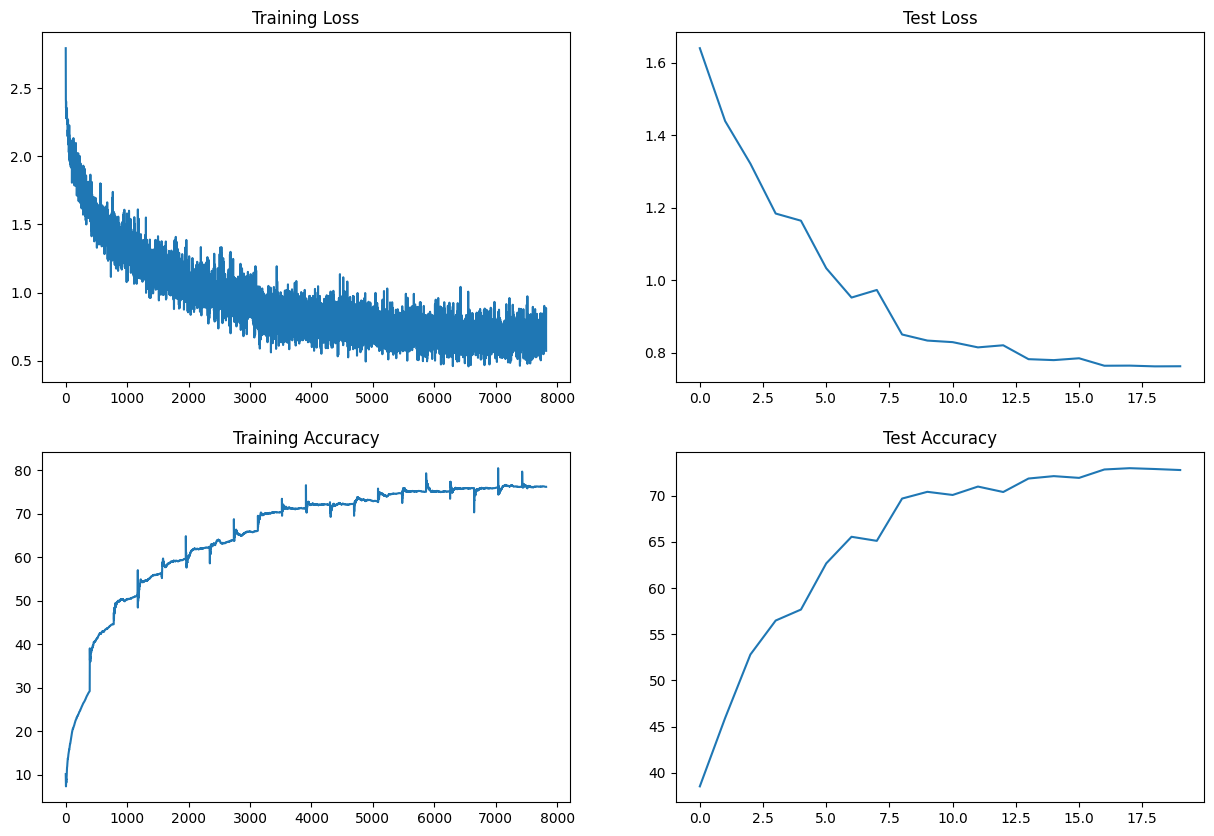

In [11]:
plot_graphs(train_losses , train_acc , test_losses , test_acc)

In [12]:
misclassified_images, predictions, labels = get_misclassified_images(model1 , test_loader , device)

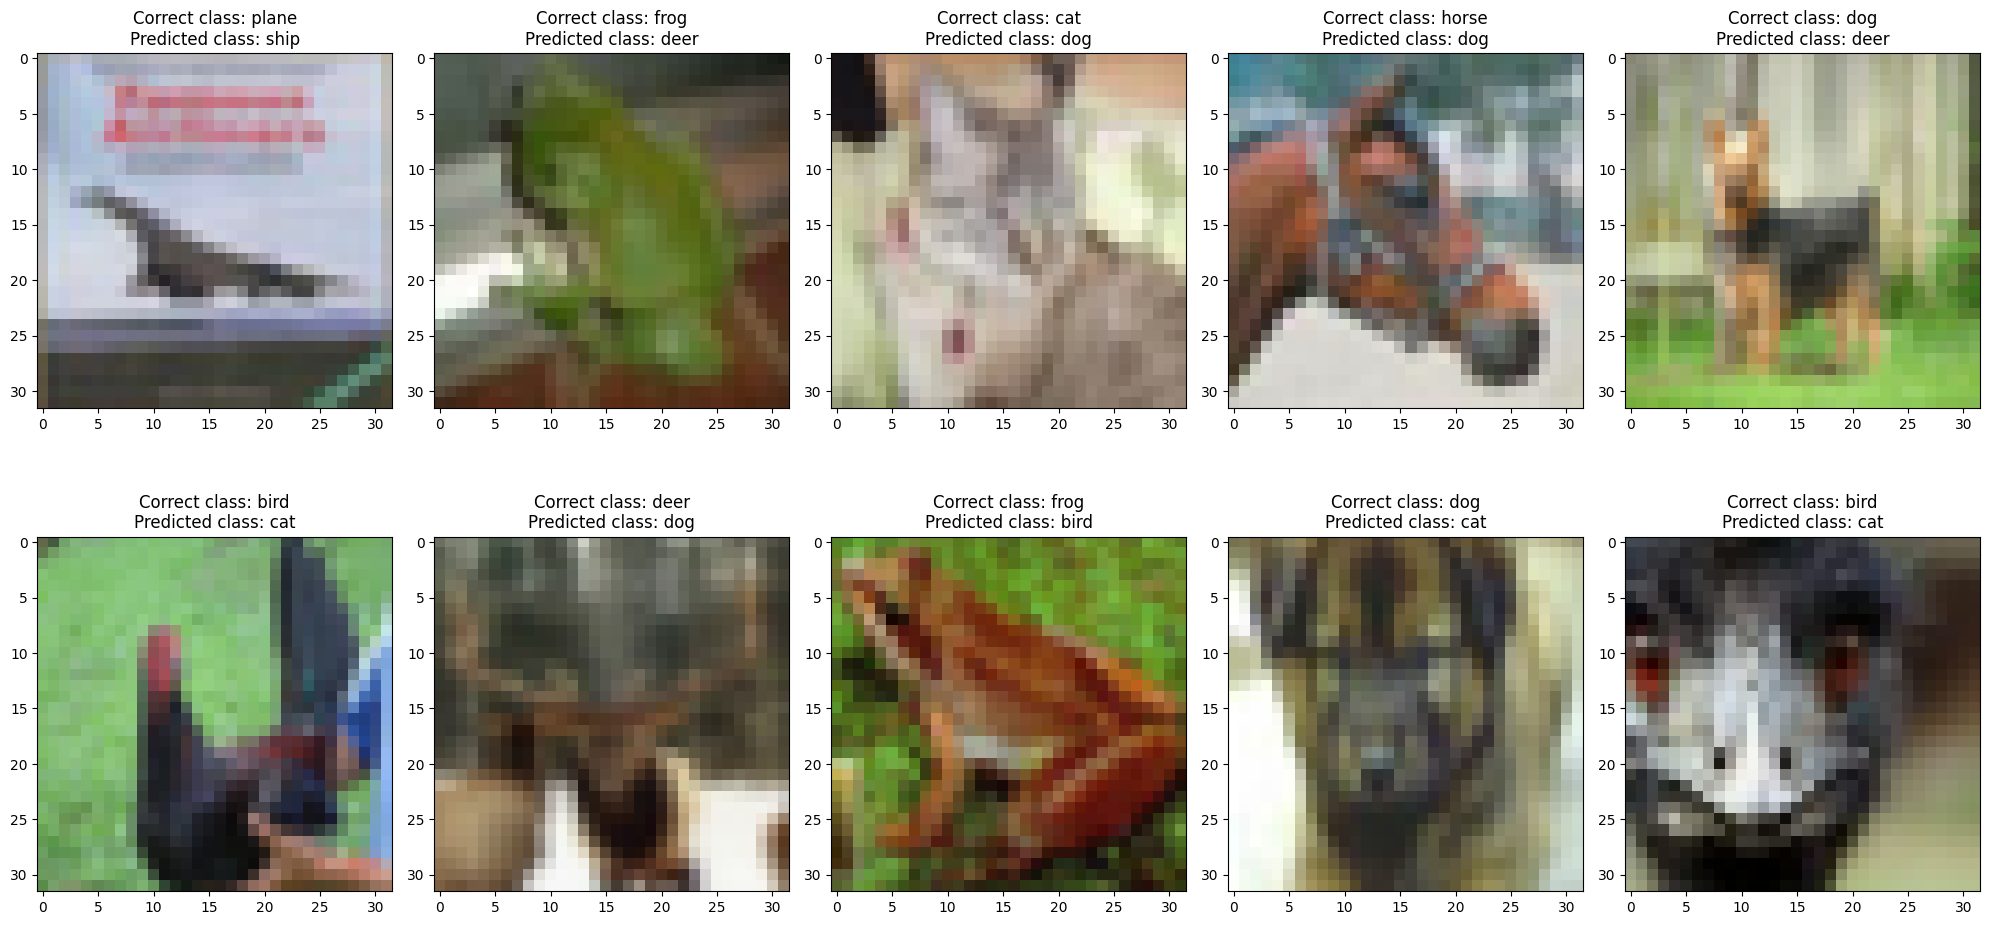

In [13]:
show_misclassified_images(
    misclassified_images[:10],
    predictions[:10],
    labels[:10],
    classes,
)